## Churn Modellling
- wheather customer will exist in future or not

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as keras
import tensorflow as tf

In [2]:
#print(tf.__version__)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout #regularization parameter, mostly used in neural network
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

from sklearn.preprocessing import StandardScaler

In [4]:
# Importing the dataset
dataset = pd.read_csv(r'C:\Users\DELL\Downloads\3. Deep Learning\1. ANN\Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [7]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Feature Scaling is required in DL becoz forward and back propogation happen quickly
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer. so we have 11 I/P with 6 hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer. again we use 6 hidden layer again
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer. Output has 1 with sigmoid layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


C:\Users\DELL\anaconda3\envs\tensflow\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compiling the ANN. loss is binary becoz its a binary problem
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6737 - loss: 0.6629 - val_accuracy: 0.7573 - val_loss: 0.5494
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7806 - loss: 0.5294 - val_accuracy: 0.7910 - val_loss: 0.5072
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7877 - loss: 0.5010 - val_accuracy: 0.7952 - val_loss: 0.4923
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7920 - loss: 0.4885 - val_accuracy: 0.7940 - val_loss: 0.4834
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8030 - loss: 0.4714 - val_accuracy: 0.7940 - val_loss: 0.4761
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7848 - loss: 0.4802 - val_accuracy: 0.7952 - val_loss: 0.4698
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8043 - loss: 0.4514 - val_accuracy: 0.7959 - val_loss: 0.4643
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8041 - loss: 0.4539 - val_accu

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


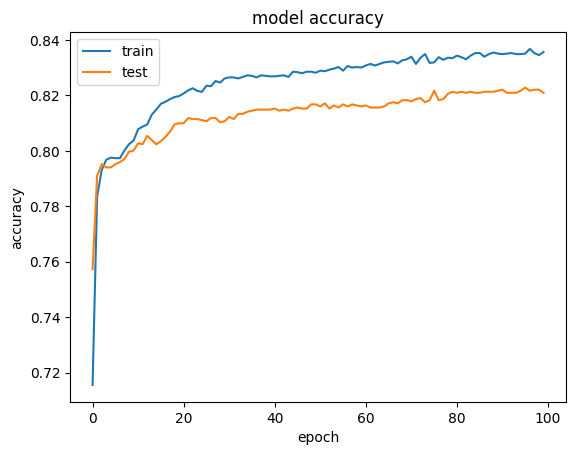

In [13]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


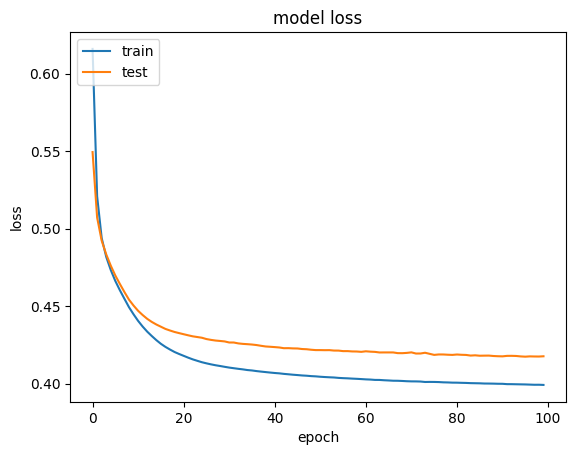

In [14]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [15]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

### Selecting Hidden layer, Activation function as hyperparameter

In [19]:
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
def create_model(layers, activation):
        model= Sequential()
        for i, nodes in enumerate(layers):
            if i==0:
                model.add(Dense(nodes, input_dim=X_train.shape[1]))
                model.add(Activation(activation))
            else:
                model.add(Dense(nodes))
                model.add(Activation(activation))
        model.add(Dense(1))
        
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model
    
model= KerasClassifier(model=create_model, verbose=0, activation='relu', layers=20)

In [31]:
model

KerasClassifier(
	model=<function create_model at 0x000001C2C4769750>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	activation=relu
	layers=20
	class_weight=None
)

In [32]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [33]:
grid_result = grid.fit(X_train, y_train)

C:\Users\DELL\anaconda3\envs\tensflow\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\DELL\anaconda3\envs\tensflow\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\DELL\anaconda3\envs\tensflow\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_reg

C:\Users\DELL\anaconda3\envs\tensflow\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


C:\Users\DELL\anaconda3\envs\tensflow\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\DELL\anaconda3\envs\tensflow\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\DELL\anaconda3\envs\tensflow\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_reg

In [34]:
[grid_result.best_score_,grid_result.best_params_]

[0.853375,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': [45, 30, 15]}]